# Linear Regression

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
import pandas
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

In [3]:
# ?LinearRegression

In [4]:
# load the boston housing data
boston = load_boston()
X, Y = boston.data, boston.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:350], Y[:350]
test_data, test_labels = X[350:], Y[350:]

In [5]:
print (len(train_data), len(test_data))

350 156


In [6]:
df_boston = pandas.DataFrame(X, columns=boston.feature_names)
df_boston['PRICE'] =  boston.target
df_target = pandas.DataFrame(boston.target)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,24.0
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,21.6
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,34.7
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,33.4
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,22.4
502,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,20.6
503,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,23.9
504,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,22.0


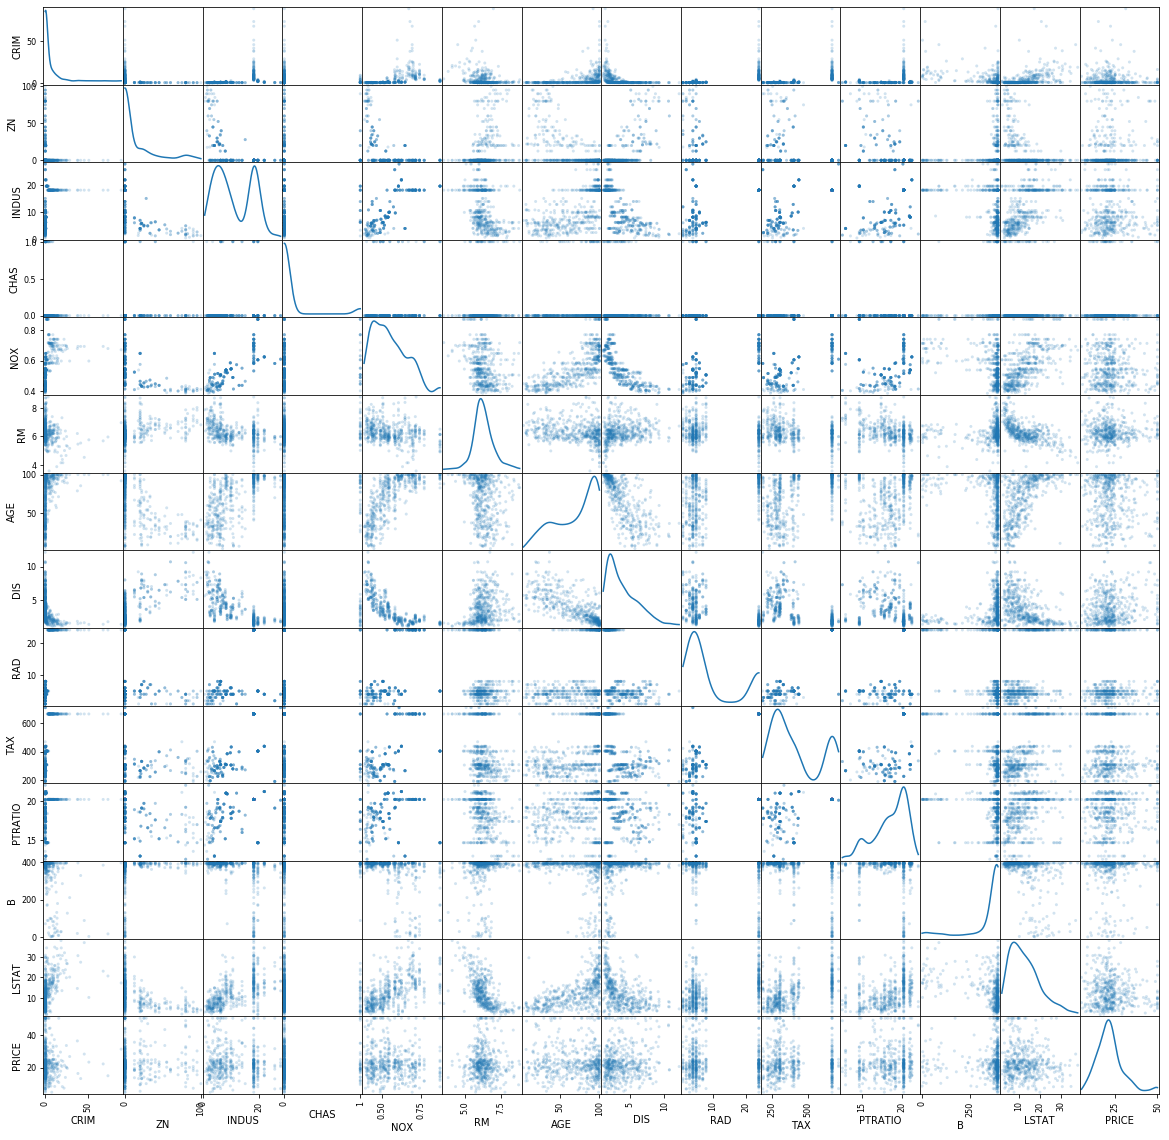

In [7]:
_ = scatter_matrix(df_boston, alpha=0.2, figsize=(20, 20), diagonal='kde')

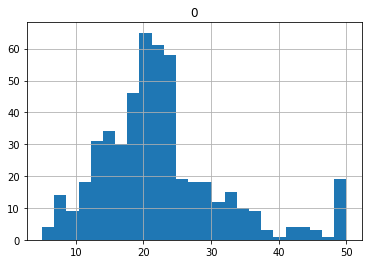

In [8]:
# check out just the home prices
_ = df_target.hist(bins=25)

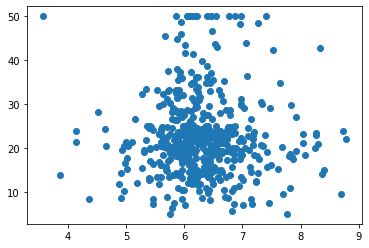

In [9]:
# plot rooms in house vs home price
_ = plt.scatter(df_boston.RM, df_boston.PRICE)

## setup and run regression

In [10]:
len(train_labels)

350

In [11]:
train_labels

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5,
       13.6, 17.4,  8.4, 35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2,
       25. , 24.1, 16.6, 32.9, 36.2, 11. ,  7.2, 22

In [12]:
lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lr_model.intercept_, lr_model.coef_

(34.35267294573405,
 array([-1.02107329e-01,  3.99278742e-02,  1.74870910e-02,  1.08772261e+00,
        -1.71636319e+01,  3.93137958e+00,  9.14939831e-04, -1.34374341e+00,
         3.85266874e-01, -1.65249144e-02, -8.86321812e-01,  9.74793769e-03,
        -4.99076593e-01]))

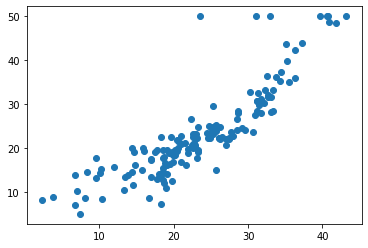

In [14]:
predicted_test_values = lr_model.predict(test_data)
_ = plt.scatter(predicted_test_values, test_labels)

In [15]:
# ?lr_model.score

In [16]:
# what is R^2 of our fit?
lr_model.score(test_data, test_labels)

0.7518083416402176